<a href="https://colab.research.google.com/github/Van-Wu1/cycle/blob/main/scr/py/env.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Ëøô‰∏™Â∞±ÊòØdriveÈáåÈù¢ÁöÑÊñá‰ª∂Ë∑ØÂæÑ
!ls '/content/drive/MyDrive/CASA0004_Cycling/data'

BoroughShp
city_of_london_bike_accessible_roads.geojson
COL_cycleavailable.geojson
COL_cyclelane.geojson
Env
greater_london_bike_accessible_roads.geojson
GreatLondonShp
Roads
Slope


## Âü∫Á°ÄÂØºÂÖ•Âï•ÁöÑ

In [3]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from shapely.strtree import STRtree

## 1.gvi

The GVI dataset used in this study is derived from the Treepedia project (MIT, 2015), based on Google Street View images captured around 2015. While this may not fully reflect recent greening interventions or urban modifications, GVI is used here as a general proxy for the visual landscape structure. Limitations related to data currency are discussed in Section X.

Êú¨Á†îÁ©∂ÊâÄÁî®GVIÊï∞ÊçÆÊù•Ëá™‰∫éMIT TreepediaÈ°πÁõÆÔºåÂü∫‰∫éÁ∫¶2015Âπ¥ÁöÑGoogleË°óÊôØÂõæÂÉè„ÄÇÂ∞ΩÁÆ°ÂèØËÉΩÊó†Ê≥ïÂèçÊò†ÊúÄËøëÁªøÂåñÊàñË°óÊôØÂèòÂåñÔºå‰ΩÜÂÖ∂‰Ωú‰∏∫ÂüéÂ∏ÇÁ©∫Èó¥ÁªøÊÑèÁªìÊûÑÁöÑ‰ª£Ë°®ÊÄßÊåáÊ†áÔºå‰ªçÂÖ∑ÊúâÂèÇËÄÉ‰ª∑ÂÄºÔºåÁõ∏ÂÖ≥Êó∂ÊïàÊÄßÂ±ÄÈôêÂ∞ÜÂú®ÂêéÊñáËÆ®ËÆ∫ÈÉ®ÂàÜËØ¥Êòé„ÄÇ

To address gaps in GVI coverage along street segments, a borough-level imputation strategy was applied. Each road segment was first assigned a GVI value based on the average of nearby GVI points within a 20-meter buffer. For segments lacking any such points, the mean GVI value of the corresponding Greater London borough was used as a proxy. All imputed values were flagged to ensure transparency and to support subsequent interpretation.

‰∏∫Ëß£ÂÜ≥Ë°óÈÅìË∑ØÊÆµÂÜÖ GVI Êï∞ÊçÆË¶ÜÁõñ‰∏çË∂≥ÁöÑÈóÆÈ¢òÔºåÊú¨Á†îÁ©∂ÈááÁî®‰∫ÜÂü∫‰∫é BoroughÔºà‰º¶Êï¶Ë°åÊîøÂå∫ÔºâÂàíÂàÜÁöÑÂàÜÁªÑÊèíÂÄºÁ≠ñÁï•„ÄÇÈ¶ñÂÖàÔºå‰ºòÂÖà‰ΩøÁî® 20 Á±≥ÁºìÂÜ≤Âå∫ÂÜÖÁöÑ GVI ÁÇπÂùáÂÄºËµãÂÄºÁªôÈÅìË∑ØÊÆµÔºõËã•ÁºìÂÜ≤Âå∫ÂÜÖÊú™ÊâæÂà∞‰ªª‰Ωï GVI ÁÇπÔºåÂàôÊ†πÊçÆËØ•Ë∑ØÊÆµÊâÄÂú® Borough ÁöÑÂπ≥Âùá GVI ÂÄºËøõË°åÊèíÂÄºË°•ÂÖ®„ÄÇÊâÄÊúâÊèíÂÄºÊÆµÂùáË¢´Ê†áËÆ∞Ôºå‰ª•‰øùËØÅÂàÜÊûêËøáÁ®ãÁöÑÈÄèÊòéÊÄßÂíåÂêéÁª≠ÁªìÊûúËß£ÈáäÁöÑ‰∏•Ë∞®ÊÄß„ÄÇ

### ÂÖàÂØºÂÖ•‰∏Ä‰∏ãÊï∞ÊçÆÔºà‰∏ÄÁõ¥Âá∫ÈîôÂïäÂ¶àÁöÑ

In [4]:
boroughs_gdf = gpd.read_file("/content/drive/MyDrive/CASA0004_Cycling/data/BoroughShp/borough/borough.shp")
print(boroughs_gdf.columns)

edges_gdf = gpd.read_file("/content/drive/MyDrive/CASA0004_Cycling/data/Roads/london_edges_FIXED.gpkg")
print(edges_gdf.columns)

gvi_points = gpd.read_file("/content/drive/MyDrive/CASA0004_Cycling/data/Env/greenview_london.json/greenview_london.json")
print(gvi_points.columns)

Index(['NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'ONS_INNER', 'SUB_2009',
       'SUB_2006', 'geometry'],
      dtype='object')
Index(['u', 'v', 'key', 'osmid', 'access', 'highway', 'maxspeed', 'name',
       'oneway', 'reversed', 'length', 'lanes', 'ref', 'bridge', 'junction',
       'tunnel', 'width', 'service', 'est_width', 'area', 'geometry'],
      dtype='object')
Index(['FID', 'PntNum', 'panoID', 'panoDate', 'greenView', 'geometry'], dtype='object')


In [5]:
projected_crs = "EPSG:27700"
edges_gdf = edges_gdf.to_crs(projected_crs)
boroughs_gdf = boroughs_gdf.to_crs(projected_crs)
gvi_points = gvi_points.to_crs(projected_crs)

In [6]:
boroughs_gdf = boroughs_gdf[['NAME', 'geometry']].rename(columns={'NAME': 'name'})

In [7]:
# Â∞Ü GVI ÁÇπËµãÂÄºÁªô BoroughÔºàÊàë‰ª¨‰πãÂêéË¶Å fallbackÔºâ
gvi_points = gvi_points.to_crs(boroughs_gdf.crs)
gvi_with_borough = gpd.sjoin(gvi_points, boroughs_gdf, how='inner', predicate='within')

# ËÆ°ÁÆó Borough ÁöÑÂπ≥Âùá GVI ÂÄº
borough_gvi_mean = gvi_with_borough.groupby('name')['greenView'].mean().to_dict()
print(borough_gvi_mean)

{'Barking and Dagenham': 9.956715211543225, 'Barnet': 17.183731562227795, 'Bexley': 12.555201401160128, 'Brent': 13.387036045154845, 'Bromley': 17.490392798331015, 'Camden': 15.705790953840856, 'City of London': 6.078575598230088, 'Croydon': 17.42361365029124, 'Ealing': 14.22662851005025, 'Enfield': 14.374663562873259, 'Greenwich': 15.130032851144279, 'Hackney': 11.230470191756273, 'Hammersmith and Fulham': 12.67179935098781, 'Haringey': 14.22248786059309, 'Harrow': 14.789230103879849, 'Havering': 13.943786303221732, 'Hillingdon': 16.309627819518948, 'Hounslow': 14.003835840731503, 'Islington': 13.337145922688226, 'Kensington and Chelsea': 13.010757235919234, 'Kingston upon Thames': 15.40256658454591, 'Lambeth': 13.578280558524852, 'Lewisham': 13.024022477114041, 'Merton': 15.501925656580617, 'Newham': 11.146743481980197, 'Redbridge': 12.134484017713365, 'Richmond upon Thames': 18.68832873456003, 'Southwark': 14.326239796140351, 'Sutton': 17.120068456362556, 'Tower Hamlets': 12.8026552

In [8]:
import geopandas as gpd
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()

# === 0. Âè™ÊäΩÂèñÂâç 3000 Êù°Ëæπ‰Ωú‰∏∫ÊµãËØïÈõÜ ===
# edges_final = edges_gdf.iloc[:10000].copy()
# Êîπ‰∏∫ÂÖ®ÈÉ®
edges_final = edges_gdf

# === 1. ÂàõÂª∫ÊØèÊù°Ë∑ØÊÆµÁöÑ‰∏≠ÁÇπÂàó ===
print("1begin")
edges_final['midpoint'] = edges_final.geometry.interpolate(0.5, normalized=True)
midpoints_gdf = gpd.GeoDataFrame(edges_final[['midpoint']], geometry='midpoint', crs=edges_final.crs)

# === 2. Âª∫Á´ã GVI Á©∫Èó¥Á¥¢ÂºïÔºåÊèêÂçáÊïàÁéá ===
print("2begin")
gvi_points = gvi_points.to_crs(edges_final.crs)
gvi_sindex = gvi_points.sindex

# === 3. ÂØπÊØèÊù°ÈÅìË∑ØÊûÑÂª∫ 30 Á±≥ÁºìÂÜ≤Âå∫Âπ∂Êü•Êâæ GVI ÁÇπ ===
print("3begin")
def compute_gvi_buffer_mean(point):
    buffer = point.buffer(30)
    possible = list(gvi_sindex.intersection(buffer.bounds))
    near = gvi_points.iloc[possible]
    near = near[near.intersects(buffer)]
    if len(near) > 0:
        return near['greenView'].mean()
    else:
        return None

midpoints_gdf['gvi_buffer_mean'] = midpoints_gdf['midpoint'].progress_apply(compute_gvi_buffer_mean)

# === 4. Áªô‰∏≠ÁÇπËµã Borough Ê†áÁ≠æÔºåÁî®‰∫é fallback ===
print("4begin")
midpoints_with_borough = gpd.sjoin(midpoints_gdf, boroughs_gdf, how='left', predicate='within')
midpoints_with_borough['borough'] = midpoints_with_borough['name']

# === 5. Âª∫Á´ãÊúÄÁªà gvi ÂÄºÂíåÊ†áËÆ∞Âàó ===
print("5begin")
def assign_final_gvi(row):
    if pd.notnull(row['gvi_buffer_mean']):
        return row['gvi_buffer_mean'], 0
    else:
        borough = row['borough']
        return borough_gvi_mean.get(borough, None), 1

midpoints_with_borough[['gvi_final', 'gvi_flag']] = midpoints_with_borough.apply(assign_final_gvi, axis=1, result_type='expand')

# === 6. ÂêàÂπ∂ÁªìÊûúÂõû edges_final ===
print("6begin")
edges_final['gvi_final'] = midpoints_with_borough['gvi_final']
edges_final['gvi_flag'] = midpoints_with_borough['gvi_flag']

1begin
2begin
3begin


  0%|          | 0/292703 [00:00<?, ?it/s]

4begin
5begin
6begin


In [12]:
print(edges_final.columns)

Index(['u', 'v', 'key', 'osmid', 'access', 'highway', 'maxspeed', 'name',
       'oneway', 'reversed', 'length', 'lanes', 'ref', 'bridge', 'junction',
       'tunnel', 'width', 'service', 'est_width', 'area', 'geometry',
       'midpoint', 'gvi_final', 'gvi_flag'],
      dtype='object')


In [13]:
# Âà†Èô§Â§ö‰ΩôÁöÑÂá†‰ΩïÂàóÔºàÊØîÂ¶Ç midpointÔºâ
edges_final = edges_final.drop(columns=['midpoint'])
edges_final.set_geometry('geometry', inplace=True)

In [14]:
edges_final.to_file("edges_with_gvi.gpkg", driver="GPKG")  # Ëã•Ë¶ÅËæìÂá∫‰∏∫ GeoJSON Êîπ‰∏∫ driver="GeoJSON"
edges_final.to_file("edges_with_gvi.geojson", driver="GeoJSON") # ËæìÂá∫‰∏∫ GeoJSON Ê†ºÂºè

print("ÂØºÂá∫ÊàêÂäü")

ÂØºÂá∫ÊàêÂäü


In [15]:
# ÁªüËÆ° gvi_flag ÂêÑÂÄºÁöÑÊï∞Èáè
flag_counts = edges_final['gvi_flag'].value_counts().sort_index()

# ËæìÂá∫ÁªìÊûú
print("GVI Ê†áËÆ∞ÂÄºÁªüËÆ°ÁªìÊûúÔºö")
for flag in flag_counts.index:
    count = flag_counts[flag]
    ratio = count / len(edges_final) * 100
    label = "ÁºìÂÜ≤Âå∫ÂÜÖÊúâÁúüÂÆûGVIÁÇπ" if flag == 0 else "‰ΩøÁî® Borough Âπ≥ÂùáÂÄº‰º∞ÁÆó"
    print(f"  gvi_flag = {flag} Ôºö{count} Êù°ÈÅìË∑ØÔºà{ratio:.2f}%Ôºâ ‚Üí {label}")

GVI Ê†áËÆ∞ÂÄºÁªüËÆ°ÁªìÊûúÔºö
  gvi_flag = 0.0 Ôºö140667 Êù°ÈÅìË∑ØÔºà48.06%Ôºâ ‚Üí ÁºìÂÜ≤Âå∫ÂÜÖÊúâÁúüÂÆûGVIÁÇπ
  gvi_flag = 1.0 Ôºö152036 Êù°ÈÅìË∑ØÔºà51.94%Ôºâ ‚Üí ‰ΩøÁî® Borough Âπ≥ÂùáÂÄº‰º∞ÁÆó


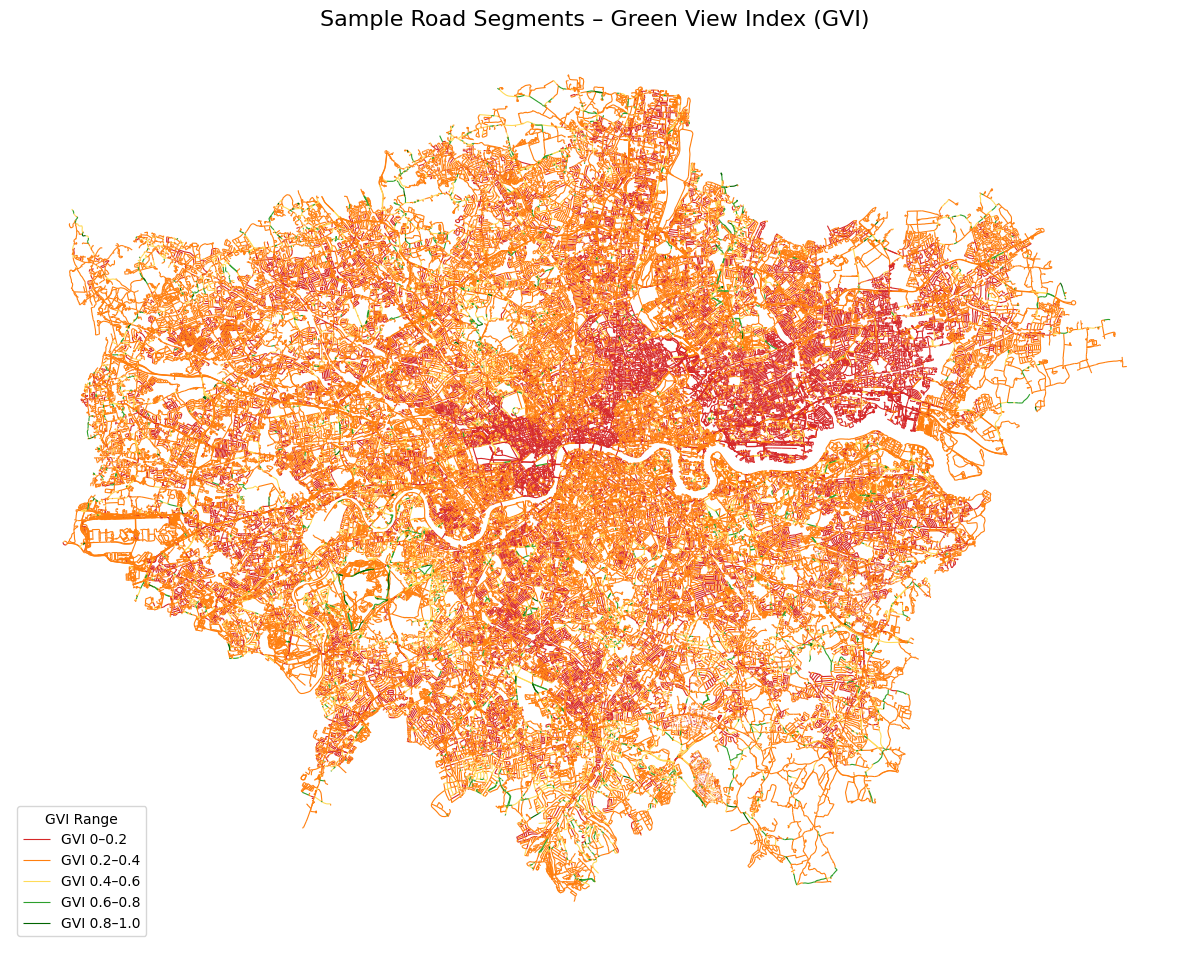

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Ëá™ÂÆö‰πâ GVI ÂàÜÁ∫ßÈ¢úËâ≤Ôºà‰ªé‰ΩéÂà∞È´òÔºâ
gvi_bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
gvi_colors = ['#d62728', '#ff7f0e', '#ffdb58', '#2ca02c', '#006400']
gvi_labels = ['0‚Äì0.2', '0.2‚Äì0.4', '0.4‚Äì0.6', '0.6‚Äì0.8', '0.8‚Äì1.0']

# Ê≠•È™§ 1ÔºöÂΩí‰∏ÄÂåñ
edges_final['gvi_final_norm'] = edges_final['gvi_final'] / edges_final['gvi_final'].max()

# Ê≠•È™§ 2ÔºöÂàÜÁªÑ
edges_final['gvi_group'] = pd.cut(
    edges_final['gvi_final_norm'],
    bins=gvi_bins,
    labels=gvi_labels,
    include_lowest=True
)

# Ê≠•È™§ 3ÔºöÁªòÂõæ
fig, ax = plt.subplots(figsize=(12, 12))
for label, color in zip(gvi_labels, gvi_colors):
    subset = edges_final[edges_final['gvi_group'] == label]
    if not subset.empty:
        subset.plot(ax=ax, color=color, linewidth=0.8, label=f'GVI {label}')

# ÁæéÂåñÂõæÂΩ¢
ax.set_title("Sample Road Segments ‚Äì Green View Index (GVI)", fontsize=16)
ax.set_axis_off()
ax.legend(title="GVI Range", loc='lower left')
plt.tight_layout()
plt.show()

#Â§áÁî®‰∏Ä‰∏™
edges_copy = edges_final

<Axes: >

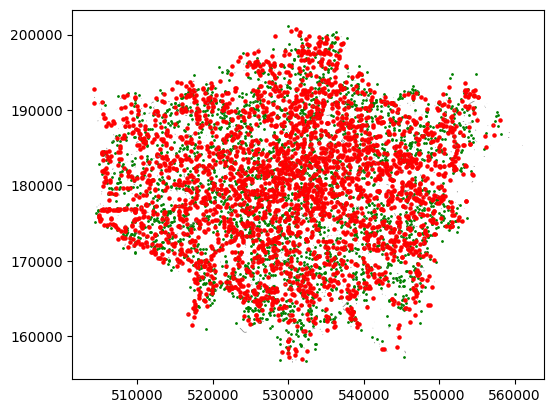

In [17]:
ax = edges_gdf.sample(3000).plot(color='gray', linewidth=0.5)
gvi_points.sample(3000).plot(ax=ax, color='green', markersize=1)
midpoints_gdf.sample(3000).plot(ax=ax, color='red', markersize=5)

### ÁÑ∂ÂêéÂÅö‰∏Ä‰∏ãÁ¨¨‰∫åÈÉ®ÂàÜÁöÑAQI

In [18]:
# !pip install rasterstats
!pip install rasterio geopandas rasterstats

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 56.6/56.6 kB 2.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22.2/22.2 MB 85.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17.3/17.3 MB 89.6 MB/s eta 0:00:00


In [19]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from rasterstats import zonal_stats
import json

In [20]:
NO2 = '/content/drive/MyDrive/CASA0004_Cycling/data/Env/NO2/AQI.tif'
with rasterio.open(NO2) as src:
    no2_array = src.read(1)
    meta = src.meta

print(no2_array.shape)
print(meta)


(2253, 2918)
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': 3.3999999521443642e+38, 'width': 2918, 'height': 2253, 'count': 1, 'crs': CRS.from_wkt('PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4277"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.9996012717],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","27700"]]'), 'transform': Affine(20.0, 0.0, 503590.0,
       0.0, -20.0, 200930.0)}


In [21]:
# üö¥ Áõ¥Êé•Áî®Êï¥Âº† NO‚ÇÇ Ê†ÖÊ†ºËøõË°å zonal overlay
print("üöÄ Ê≠£Âú®ÊâπÈáèËÆ°ÁÆó NO‚ÇÇ Âπ≥ÂùáÂÄºÔºàÁü¢ÈáèÂåñÊñπÂºèÔºâ...")

# Áªü‰∏ÄÂùêÊ†áÁ≥ª‰∏∫ EPSG:27700ÔºàLAEI Ê†ÖÊ†ºÁî®ÁöÑ BNG ÊäïÂΩ±Ôºâ
edges_final = edges_final.to_crs('EPSG:27700')

# ÊâßË°å zonal_stats
zs = zonal_stats(edges_final, NO2, stats=['mean'], geojson_out=False)

# Âä†ÂÖ•ÁªìÊûúÂàó
edges_final['NO2_mean'] = [item['mean'] for item in zs]

print("Â§ÑÁêÜÂÆåÊàêÔºåÂÖ±ËµãÂÄºÔºö", len(zs), "Êù°ÈÅìË∑ØÊÆµ")

üöÄ Ê≠£Âú®ÊâπÈáèËÆ°ÁÆó NO‚ÇÇ Âπ≥ÂùáÂÄºÔºàÁü¢ÈáèÂåñÊñπÂºèÔºâ...
Â§ÑÁêÜÂÆåÊàêÔºåÂÖ±ËµãÂÄºÔºö 292703 Êù°ÈÅìË∑ØÊÆµ


In [22]:
# Êü•ÁúãÂÄºÂàÜÂ∏É
print(edges_final['NO2_mean'].describe())

count    292125.000000
mean         21.247719
std           4.865328
min          12.893730
25%          18.010975
50%          20.144176
75%          23.153086
max          87.332474
Name: NO2_mean, dtype: float64


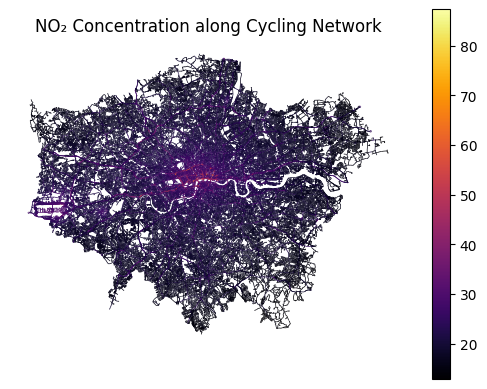

In [23]:
edges_final.plot(column='NO2_mean', cmap='inferno', linewidth=0.5, legend=True)
plt.title('NO‚ÇÇ Concentration along Cycling Network')
plt.axis('off')
plt.show()

In [24]:
edges_final.to_file("edges_gvi_no2.gpkg", driver="GPKG")  # Ëã•Ë¶ÅËæìÂá∫‰∏∫ GeoJSON Êîπ‰∏∫ driver="GeoJSON"
edges_final.to_file("edges_gvi_no2.geojson", driver="GeoJSON") # ËæìÂá∫‰∏∫ GeoJSON Ê†ºÂºè

print("ÂØºÂá∫ÊàêÂäü")

ÂØºÂá∫ÊàêÂäü


### ÂóØÂóØÂÅö‰∏Ä‰∏ã10

In [25]:
# Âä†ËΩΩËá™ÁÑ∂ÁâπÂæÅ shapefile
natural = gpd.read_file('/content/drive/MyDrive/CASA0004_Cycling/data/Env/nature_features/greater_london_nature_features.shp')

# Á°Æ‰øùÊäïÂΩ±‰∏ÄËá¥Ôºà‰ΩøÁî® EPSG:27700 Ëã±ÂõΩÂõΩÂÆ∂ÁΩëÊ†ºÔºâ
natural = natural.to_crs('EPSG:27700')
edges_final = edges_final.to_crs('EPSG:27700')

In [26]:
# Âª∫Á´ãÁºìÂÜ≤Âå∫ÔºàÂçï‰Ωç‰∏∫Á±≥Ôºâ
natural_buffer = natural.buffer(50)

# ÂàõÂª∫‰∏Ä‰∏™Êñ∞ÁöÑ GeoDataFrameÔºàÂøÖË¶ÅÔºâ
natural_buffer_gdf = gpd.GeoDataFrame(geometry=natural_buffer, crs='EPSG:27700')

In [27]:
# Âà§Êñ≠ÊØèÊù°Ë∑ØÊòØÂê¶‰∏éÁºìÂÜ≤Âå∫Áõ∏‰∫§ÔºåËøîÂõû True/False ÂàóË°®
intersects = edges_final.geometry.intersects(natural_buffer_gdf.unary_union)

# Ê∑ªÂä†Êñ∞Â≠óÊÆµ natural_featureÔºå1 Ë°®Á§∫Ë¢´Ë¶ÜÁõñÔºå0 Ë°®Á§∫‰∏çË¢´Ë¶ÜÁõñ
edges_final['natural_feature'] = intersects.astype(int)

/tmp/ipython-input-27-2242247040.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  intersects = edges_final.geometry.intersects(natural_buffer_gdf.unary_union)


In [28]:
print(edges_final.columns)

Index(['u', 'v', 'key', 'osmid', 'access', 'highway', 'maxspeed', 'name',
       'oneway', 'reversed', 'length', 'lanes', 'ref', 'bridge', 'junction',
       'tunnel', 'width', 'service', 'est_width', 'area', 'geometry',
       'gvi_final', 'gvi_flag', 'gvi_final_norm', 'gvi_group', 'NO2_mean',
       'natural_feature'],
      dtype='object')


In [29]:
edges_final.to_file("edges_gvi_no2_nf.gpkg", driver="GPKG")  # Ëã•Ë¶ÅËæìÂá∫‰∏∫ GeoJSON Êîπ‰∏∫ driver="GeoJSON"
edges_final.to_file("edges_gvi_no2_nf.geojson", driver="GeoJSON") # ËæìÂá∫‰∏∫ GeoJSON Ê†ºÂºè

print("ÂØºÂá∫ÊàêÂäü")

ÂØºÂá∫ÊàêÂäü
